# Import

In [1]:
import numpy as np
import pandas as pd

import requests
import bs4
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import datetime
import re

from sklearn.model_selection import train_test_split  

# Functions

In [2]:
# Changes the value of 0 and 1
def change_value(cell):
    if cell == 1:
        return 0
    else:
        return 1
    
# Search for national cuisine in the column
def cuisine_search(column):
    for cell in countries:
        if cell in column:
            return 1
        else:
            0

# When adding a new column (dummy variable) 
# we put 1 - if there is one, 0 - if there is no one
def find_item(cell):
    if item in cell:
        return 1
    return 0

# Cuisine count
def find_cuisine(cell):
    cell = cell.split(',')
    return len(cell)

# Date search
def add_date(x):
    if x == []:
        return 0
    else:
        return 1

# Search for the number of reviews via dates
def find_review_date(cell):
    if len(cell) > 10:
        return 2
    elif len(cell) > 0:
        return 1
    else:
        return 0
    
# Quality of the review through positive mood in the review  
def mood(column):
    i = 0
    for cell in column:
        for mood in words:
            if mood == cell:
                i += 1
    return i

# Quality of the review through negative mood in the review
def mood_bad(column):
    i = 0
    for cell in column:
        for mood in bad_words:
            if mood == cell:
                i += 1
    return i

# Checking for missing values in the column
def precent_check(column):
    math = 100 - ((df[column].count() * 100) / 40000)
    print("The",column,"column is missing", '\033[4m' + str(round(math, 2)),"percent" + '\033[0m',"of the information.")
    
# Output of basic statistics of categorical features
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Construction of the histogram and the output of the basic statistics of digital signs
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())

# ---------------------------- Data ----------------------------

# Information

* Restaurant_id: Restaurant ID
* City: City 
* Cuisine Style: Cuisine
* Ranking: Restaurant ranking relative to other restaurants in the city
* Price Range: Restaurant prices in 3 categories
* Number of Reviews: Number of reviews
* Reviews: Last 2 reviews and dates of reviews
* URL_TA: The restaurant's page on 'www.tripadvisor.com'. 
* ID_TA: TripAdvisor restaurant ID
* Rating: Rating of the restaurant

In [3]:
df = pd.read_csv('main_task_new.csv') 

In [4]:
df.head()

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Как мы видим, существуют заметные пропуски в:
* Cuisine Style
* Price Range
* Number of Reviews

# Preprocessing

In [6]:
# For easy viewing we remove 
# cell view restrictions
pd.set_option('display.max_colwidth', None)

In [7]:
# Rename the column indexes
df.columns = ['restaurant_id','city','cuisine_style','ranking','rating',
              'price_range','reviews_number','reviews','url_ta','id_ta']

In [8]:
# Check the number of missing values in the columns
precent_check('price_range')
precent_check('cuisine_style')
precent_check('reviews_number')

The price_range column is missing 34.72 percent of the information.
The cuisine_style column is missing 23.21 percent of the information.
The reviews_number column is missing 6.36 percent of the information.


In [9]:
df.ranking.fillna(value = 0, inplace = True)
df.rating.fillna(value = 0, inplace = True)
df['reviews_number'].fillna(value = 0, inplace = True)

# Processing

### restaurant_id

In [10]:
# Let's check the categorical feature - restaurant_id
# As we can see, some restaurants are more common,
# which tells us about the restaurant chain

categorical_check('restaurant_id')

restaurant_id
id_871               18
id_633               18
id_436               18
id_227               18
id_534               17
...                 ...
id_12243              1
id_6028               1
id_6807               1
id_16315              1
id_11733              1

[11909 rows x 1 columns]

count      40000
unique     11909
top       id_871
freq          18
Name: restaurant_id, dtype: object


### city

In [11]:
# Let's check the categorical feature - city
# A large number of restaurants are concentrated
# in London, the capital of Great Britain

categorical_check('city')

city
London      5757
Paris       4897
Madrid      3108
Barcelona   2734
Berlin      2155
Milan       2133
Rome        2078
Prague      1443
Lisbon      1300
Vienna      1166
Amsterdam   1086
Brussels    1060
Hamburg      949
Munich       893
Lyon         892
Stockholm    820
Budapest     816
Warsaw       727
Dublin       673
Copenhagen   659
Athens       628
Edinburgh    596
Zurich       538
Oporto       513
Geneva       481
Krakow       443
Oslo         385
Helsinki     376
Bratislava   301
Luxembourg   210
Ljubljana    183

count      40000
unique        31
top       London
freq        5757
Name: city, dtype: object


<AxesSubplot:>

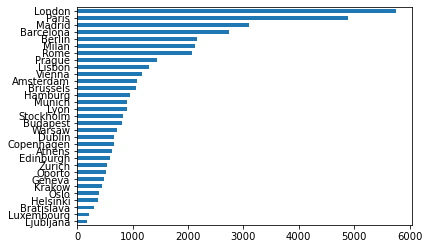

In [12]:
df.city.value_counts(ascending=True).plot(kind='barh')

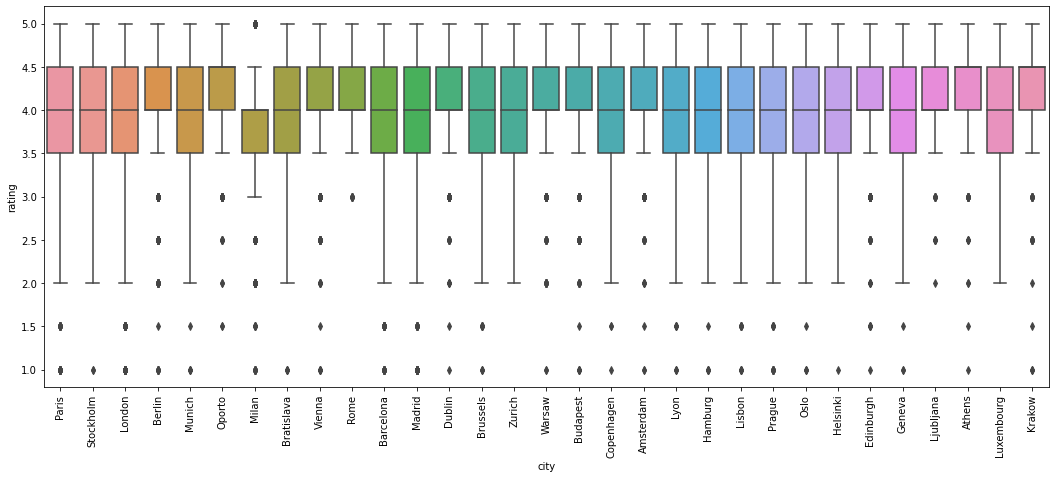

In [13]:
# Let's look at the distribution of rankings by city

plt.figure(figsize=(18, 7))
sns.boxplot(x='city', y='rating', data=df)
plt.xticks(rotation=90);

Let's process the cities by rating and add new attributes --> rank_city_min , rank_city_max , rank_normal

In [14]:
rank_city_min = df.groupby(['city'])['ranking'].min().to_dict()
rank_city_max = df.groupby(['city'])['ranking'].max().to_dict()

df['rank_city_min'] = df.city.map(rank_city_min)
df['rank_city_max'] = df.city.map(rank_city_max)
df['rank_normal'] = df.apply(lambda x: (x['ranking'] - x['rank_city_min'])/(x['rank_city_max'] - x['rank_city_min']), axis=1)

Allocate restaurant availability by city 
and add a new attribute --> rest_in_city

In [15]:
df['rest_in_city'] = df['city'].map(df.groupby(['city'])['restaurant_id'].count().to_dict())

### cuisine_style

In [16]:
# Let's check the categorical feature - cuisine_style
# There are a lot of dirty values  
# That need to be cleaned up

categorical_check('cuisine_style')

cuisine_style
['Italian']                                                                                                                      1032
['French']                                                                                                                        805
['Spanish']                                                                                                                       695
['French', 'European']                                                                                                            405
['Cafe']                                                                                                                          403
...                                                                                                                               ...
['European', 'International', 'Contemporary', 'Fusion', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']              1
['Steakhouse', 'American', 'British', 'Vegetarian Friendly', 'Halal']                                                               1
['French', 'Moroccan', 'Mediterranean', 'Soups', 'Vegetarian Friendly']                                                             1
['Chinese', 'Asian', 'Thai', 'Fast Food']                                                                                           1
['Bar', 'International', 'British']                                                                                                 1

[9007 rows x 1 columns]

count           30717
unique           9007
top       ['Italian']
freq             1032
Name: cuisine_style, dtype: object


In [17]:
# Let's add a column that shows the availability of the kitchen at each restaurant
df['no_cuisine_style'] = pd.isna(df['cuisine_style']).astype('float64')

In [18]:
# Clear the cuisine_style column of unnecessary characters
# Apply a function to count the number of kitchens in each restaurant

df.cuisine_style = df.cuisine_style.apply(lambda x: str(x).replace("\'",'').strip('[]'))
df.cuisine_style = df.cuisine_style.apply(lambda x: 'Unknown' if x == 'nan' else x)

df['cuisine_number'] = df.cuisine_style.apply(find_cuisine)

In [19]:
# Create a column that identifies the national cuisine
# among the presented cuisines in the restaurant

cuisine_style = df.cuisine_style.apply(lambda x: str(x).split(','))

In [20]:
cuisine_style = cuisine_style.explode()

In [21]:
# Add a list of all countries, which will help us in our search

countries = pd.read_csv('countries.csv')

In [22]:
countries = countries.Name

In [23]:
# Web scraping a list of national cuisines from Wikipedia

url = 'https://en.wikipedia.org/wiki/List_of_cuisines'
r = requests.get(url)

# Retrieve only the values we need from the site

soup = bs4.BeautifulSoup(r.text,'html.parser')
cuisine = soup.find_all('div',{'class':'div-col'})[0].find_all('a')

In [24]:
# Combining a list of countries and national cuisines

country = []

for item in cuisine:
    item = item.get_text()
    country.append(item)

country = pd.Series(country)
countries = countries.append(country)

In [25]:
# When web scraping, some values had two cuisines each, 
# For example: Indian Singaporean cuisine

cuisine_words = pd.Series(['Italian','Chinese','Indian',
                          'Jewish','Louisiana','Malaysian',
                         'Mediterranean','Pennsylvania','Singaporean'])
countries = countries.append(cuisine_words)

In [26]:
# Apply the function to find the cuisine within the column,
# the result of having a national cuisine is 1,
# lacking - 0

df['cuisine_national'] = df.cuisine_style.apply(cuisine_search)

In [27]:
df['cuisine_national'] = df['cuisine_national'].fillna(value = 0)

In [28]:
df.cuisine_national.value_counts()

1.0    24993
0.0    15007
Name: cuisine_national, dtype: int64

### price_range

In [29]:
# As we can see price_range has three values and one value is nan

print(df.price_range.unique())
df.price_range.value_counts()

['$$ - $$$' nan '$$$$' '$']


$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

In [30]:
# Replacing nan values with the most common value
# Let's add a new column with the presence of price initially
# Let's modify the price category column: 
# 3 - highest price, 2 - average price, 1 - lowest price

df['no_price'] = pd.isna(df['price_range']).astype('uint8')

In [31]:
df.no_price = df.no_price.apply(change_value)

In [32]:
replace_price = {'price_range': {"$": 1, "$$ - $$$": 2, "$$$$": 3, np.NaN: 2}}
df.replace(replace_price, inplace=True)

### reviews

In [33]:
# Lots of missing and lots of useful but unprocessed information
categorical_check('reviews')

reviews
[[], []]                                                                                                            6471
[['Good Lebanese food', 'Decent place'], ['07/19/2017', '03/17/2017']]                                                 2
[['Nice restaurant in Madrid', 'Highly reccomended'], ['11/10/2017', '05/21/2017']]                                    2
[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]                                2
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                                                2
...                                                                                                                  ...
[['A Brunch experience not to be repeated', 'Very poor brunch'], ['02/18/2018', '02/18/2018']]                         1
[['Good hotel in central location', 'Israeli/french and very swish restaurant'], ['06/09/2016', '05/25/2016']]         1
[['Your standard good pizza'], ['06/07/2016']]                                                                         1
[['Good quality, very cheap buffet', 'A satisfying lunch break - and low cost!'], ['07/17/2017', '05/04/2017']]        1
[['Lovely food, excellent value', 'What an experience'], ['02/28/2017', '06/23/2016']]                                 1

[33516 rows x 1 columns]

count        40000
unique       33516
top       [[], []]
freq          6471
Name: reviews, dtype: object


In [34]:
# Convert all the letters to lower case
df.reviews = df.reviews.apply(lambda x: x.lower())

In [35]:
# Define words to search for in reviews
words = ['good', 'great', 'nice', 'best', 'excellent', 
         'delicious', 'friendly', 'lovely' , 'unique', 
         'amazing', 'tasty', 'fantastic', 'perfect', 'wonderful',
        'super', 'awesome', 'love', 'beautiful', 'superb', 
         'interesting','yummy', 'fine', 'favourite', 
         'surprise', 'loved', 'brilliant','favorite']

df['words'] = df.reviews.str.findall(r"(\w+)")

In [36]:
bad_words = ['wasting', 'boring', 'lack', 'shameful',
             'not', 'avoid', 'ordinary', 'ordinary',
            'terrible','terrible', 'tired', 'dried',
             'poor','expensive','disappointed''dirty',
             'nothing','stuffy','dark','worst','inedible']

df['bad_words'] = df.reviews.str.findall(r"(\w+)")

Create a new feature --> review_mood

In [37]:
df['review_mood'] = df.words.dropna().apply(mood)
df.review_mood.fillna(0, inplace=True)

In [38]:
df['review_mood_bad'] = df.words.dropna().apply(mood_bad)
df.review_mood_bad.fillna(0, inplace=True)

Retrieve dates from reviews, creating 1 categorical feature and 2 numerical features

--> reviews_date (dates)

In [39]:
# Search for a pattern and add a feature to a new column
pattern = re.compile('\d+\/\d+\/\d+')
df['reviews_date'] = df['reviews'].apply(lambda x: pattern.findall(x))

--> review_check (review availability)

In [40]:
# Apply the function
df['review_check'] = df.reviews_date.apply(add_date)

In [41]:
# Remove unnecessary characters
df.reviews_date = df.reviews_date.apply(lambda x: str(x).replace("\'",'').strip('[]'))

--> reviews_on_website (review count)

In [42]:
# Count the number of reviews through dates
df['reviews_on_website'] = df.reviews_date.apply(find_review_date)

### ranking

<AxesSubplot:>

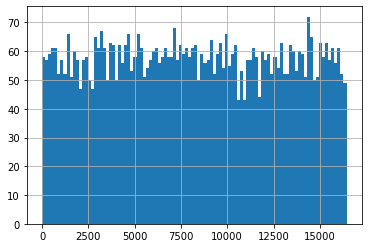

In [43]:
# Let's check the ranking in the most popular city - London
df.ranking[df['city'] =='London'].hist(bins=100)

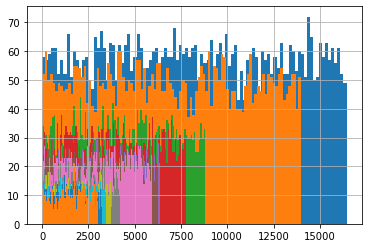

In [44]:
# Check out the rankings in the top 12 cities
for x in (df['city'].value_counts())[0:12].index:
    df['ranking'][df['city'] == x].hist(bins=100)

plt.show()

Create a new attribute --> ranking_normal

In [45]:
df['ranking_normal'] = df.ranking / df.rest_in_city

# Correlation of features

<AxesSubplot:>

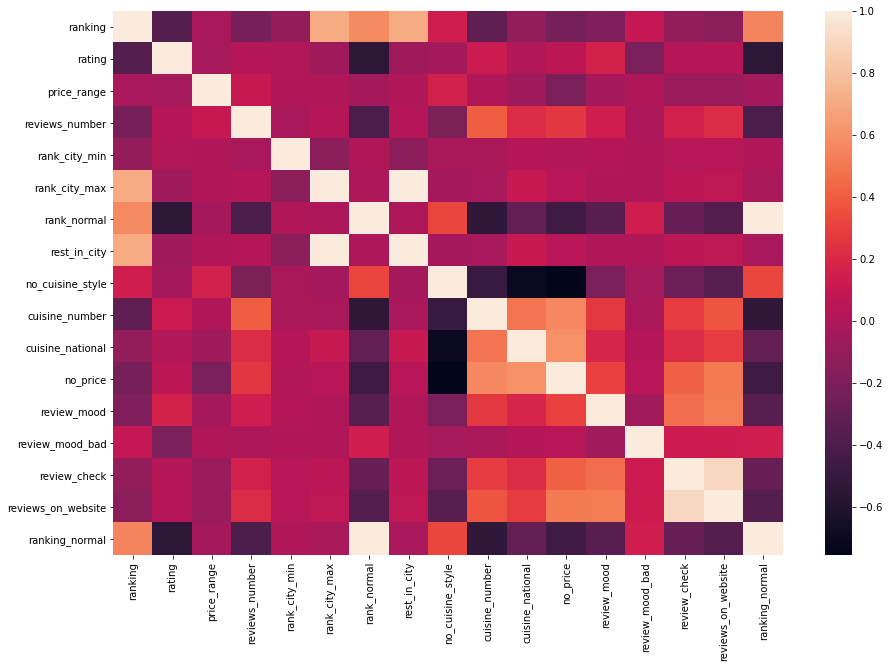

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['restaurant_id'], axis=1).corr(),)

# dummy variable

For the dummy variable were used cities --> cities

In [47]:
city = {}

for item in df.city:
    city[item] =0

def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in city:
    df[item] = df['city'].apply(find_item)

## Check all the data

In [48]:
df.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'reviews_number', 'reviews', 'url_ta', 'id_ta',
       'rank_city_min', 'rank_city_max', 'rank_normal', 'rest_in_city',
       'no_cuisine_style', 'cuisine_number', 'cuisine_national', 'no_price',
       'words', 'bad_words', 'review_mood', 'review_mood_bad', 'reviews_date',
       'review_check', 'reviews_on_website', 'ranking_normal', 'Paris',
       'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto', 'Milan',
       'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid', 'Dublin',
       'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen', 'Amsterdam',
       'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo', 'Helsinki', 'Edinburgh',
       'Geneva', 'Ljubljana', 'Athens', 'Luxembourg', 'Krakow'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   restaurant_id       40000 non-null  object 
 1   city                40000 non-null  object 
 2   cuisine_style       40000 non-null  object 
 3   ranking             40000 non-null  float64
 4   rating              40000 non-null  float64
 5   price_range         40000 non-null  int64  
 6   reviews_number      40000 non-null  float64
 7   reviews             40000 non-null  object 
 8   url_ta              40000 non-null  object 
 9   id_ta               40000 non-null  object 
 10  rank_city_min       40000 non-null  float64
 11  rank_city_max       40000 non-null  float64
 12  rank_normal         40000 non-null  float64
 13  rest_in_city        40000 non-null  int64  
 14  no_cuisine_style    40000 non-null  float64
 15  cuisine_number      40000 non-null  int64  
 16  cuis

# Break down the dataframe into the parts needed to train and test the model

In [50]:
# X is the data with restaurant information, y is the target variable (restaurant ratings)
X = df.drop(['rating','restaurant_id','city','cuisine_style',
             'reviews','url_ta', 'id_ta', 'reviews_date', 
             'words','bad_words','cuisine_national'], axis = 1)
y = df['rating']

In [51]:
# Loading the special partitioning tool:
from sklearn.model_selection import train_test_split

In [52]:
# The datasets labeled "train" will be used to train the model, "test" will be used for testing.
# For testing we will use 25% of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create, train and test the model

In [53]:
# Importing the necessary libraries:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [54]:
# Creating a model
regr = RandomForestRegressor(n_estimators=100)

# Training the model on a test data set
regr.fit(X_train, y_train)

# We use the trained model to predict the rating of the restaurants in the test sample.
# We write the predicted values into the variable y_pred
y_pred = regr.predict(X_test)

In [55]:
# We compare the predicted values (y_pred) to the actual values (y_test), and see how different they are on average
# The metric is called Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual values.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.206064


<AxesSubplot:>

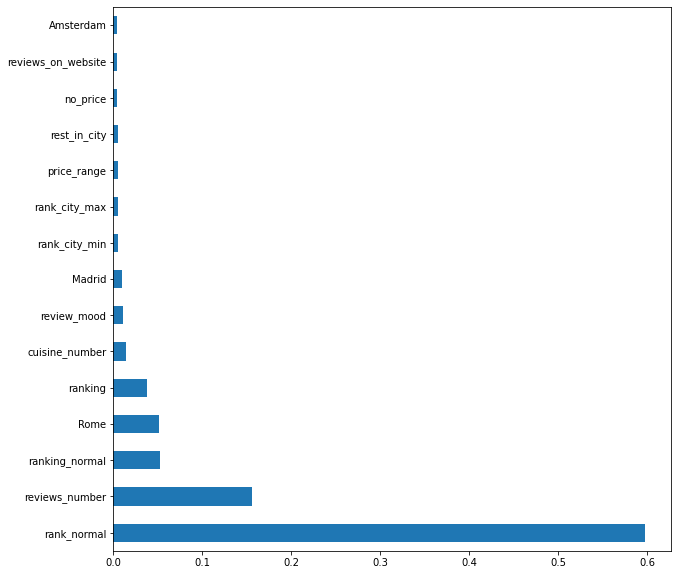

In [56]:
# In RandomForestRegressor it is possible to output the most important features for a model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')